In [ ]:
import pandas as pd
import numpy as np
import math
import sklearn
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import yfinance as yf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from tensorflow.keras.layers import GRU, Flatten, Conv1D, BatchNormalization, LeakyReLU
from keras.layers import Dropout

In [ ]:
df = yf.download("^NSEI",start="1995-11-03", end="2023-05-31")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0
...,...,...,...,...,...,...
2023-05-24,18294.800781,18392.599609,18262.949219,18285.400391,18285.400391,232600
2023-05-25,18268.900391,18338.099609,18202.400391,18321.150391,18321.150391,235900
2023-05-26,18368.349609,18508.550781,18333.150391,18499.349609,18499.349609,198700


In [ ]:
df.shape

(3847, 6)

In [ ]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
new_df = df

In [ ]:
new_df['SMA50'] = new_df['Close'].rolling(50).mean()
new_df.dropna(inplace=True)
new_df.tail()

,Open,High,Low,Close,Adj Close,Volume,SMA50
Date,,,,,,,
2023-05-24,18294.800781,18392.599609,18262.949219,18285.400391,18285.400391,232600,17703.097148
2023-05-25,18268.900391,18338.099609,18202.400391,18321.150391,18321.150391,235900,17717.728164
2023-05-26,18368.349609,18508.550781,18333.150391,18499.349609,18499.349609,198700,17739.457148
2023-05-29,18619.150391,18641.199219,18581.250000,18598.650391,18598.650391,265300,17768.344141
2023-05-30,18606.650391,18662.449219,18575.500000,18633.849609,18633.849609,234400,17800.155117


TARGET VARIABLE

[]

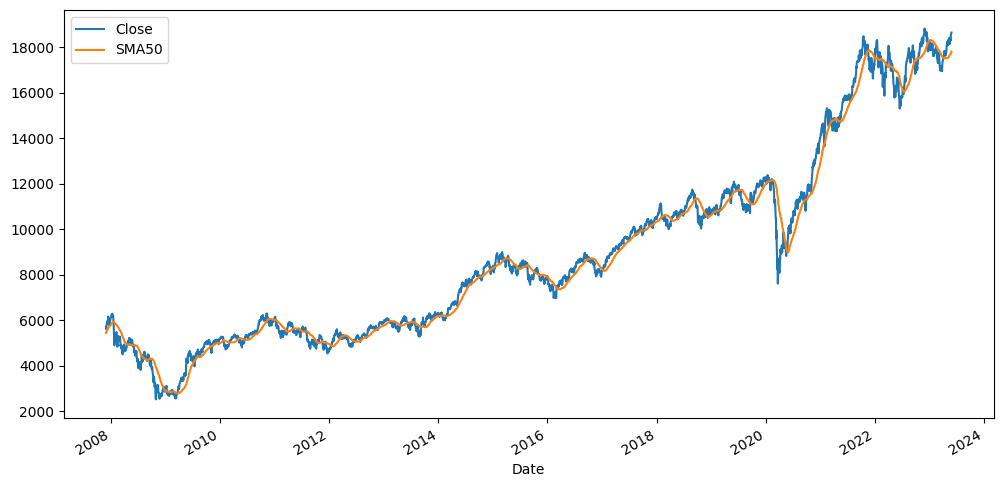

In [ ]:
new_df[['Close', 'SMA50']].plot(label='NIFTY50',figsize=(12,6)).plot()

NORMALIZATION

In [ ]:
data = new_df.filter(['Close'])
new_data = data.values
print(len(data))
new_data_length = math.ceil(len(data) * .8)
new_data_length

3798


3039

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(new_data)
scaled_data.shape

(3798, 1)

SPLITIING DATASET INTO TEST & TRAIN DATA

In [ ]:
train_data = scaled_data[0:new_data_length,]
x_train = []
y_train = []
for i in range(80,len(train_data)-1):
  x_train.append(scaled_data[i-80:i,0])
  y_train.append(scaled_data[i,0])
  if i<=90:
    print(x_train)
    print(y_train)

[array([0.19486072, 0.18991238, 0.19095916, 0.19882677, 0.20510428,
       0.20469602, 0.20970881, 0.21061131, 0.21181461, 0.21097353,
       0.21936298, 0.22317245, 0.21695942, 0.21632093, 0.19970163,
       0.19757125, 0.19811459, 0.19905699, 0.21247768, 0.21773605,
       0.21839603, 0.21828553, 0.22190162, 0.22225463, 0.22440647,
       0.22435428, 0.23023273, 0.23052744, 0.23106464, 0.23009154,
       0.2230282 , 0.22567733, 0.22608866, 0.21795092, 0.20944789,
       0.20806347, 0.19529968, 0.16481768, 0.14581631, 0.16448616,
       0.15405231, 0.17553398, 0.16882671, 0.16923803, 0.16228828,
       0.16043726, 0.17147585, 0.18045468, 0.18170711, 0.17180122,
       0.1601794 , 0.15938742, 0.14321937, 0.14206824, 0.14766736,
       0.16440022, 0.17059484, 0.1689986 , 0.16923803, 0.16148095,
       0.16377399, 0.15879804, 0.16432042, 0.16857805, 0.16847676,
       0.16950204, 0.16572018, 0.14911317, 0.14366447, 0.14717312,
       0.13797635, 0.13974448, 0.14376577, 0.14414028, 0.1288

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))  #making compatible for LSTM, RNN inputs
x_train.shape

(2958, 80, 1)

In [ ]:
test_data = scaled_data[new_data_length-80: , :]

x_test = []
y_test = new_data[new_data_length: , :]
for i in range(80,len(test_data)):
  x_test.append(test_data[i-80:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  #making compatible for LSTM, RNN inputs

**STACKED LSTM**

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 80, return_sequences=True, input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

regressor.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['accuracy'])

history = regressor.fit(x_train, y_train, batch_size = 10, epochs = 15)

y_pred = regressor.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)

Epoch 1/15
296/296 [==============================] - 64s 185ms/step - loss: 0.0042 - accuracy: 3.3807e-04
Epoch 2/15
296/296 [==============================] - 55s 187ms/step - loss: 0.0019 - accuracy: 3.3807e-04
Epoch 3/15
296/296 [==============================] - 54s 182ms/step - loss: 0.0015 - accuracy: 3.3807e-04
Epoch 4/15
296/296 [==============================] - 50s 170ms/step - loss: 0.0012 - accuracy: 3.3807e-04
Epoch 5/15
296/296 [==============================] - 50s 167ms/step - loss: 9.8087e-04 - accuracy: 3.3807e-04
Epoch 6/15
296/296 [==============================] - 49s 167ms/step - loss: 9.3041e-04 - accuracy: 3.3807e-04
Epoch 7/15
296/296 [==============================] - 50s 169ms/step - loss: 8.1479e-04 - accuracy: 3.3807e-04
Epoch 8/15
296/296 [==============================] - 51s 171ms/step - loss: 7.6157e-04 - accuracy: 3.3807e-04
Epoch 9/15
296/296 [==============================] - 52s 175ms/step - loss: 7.0096e-04 - accuracy: 3.3807e-04
Epoch 10/15
296/2

ERROR

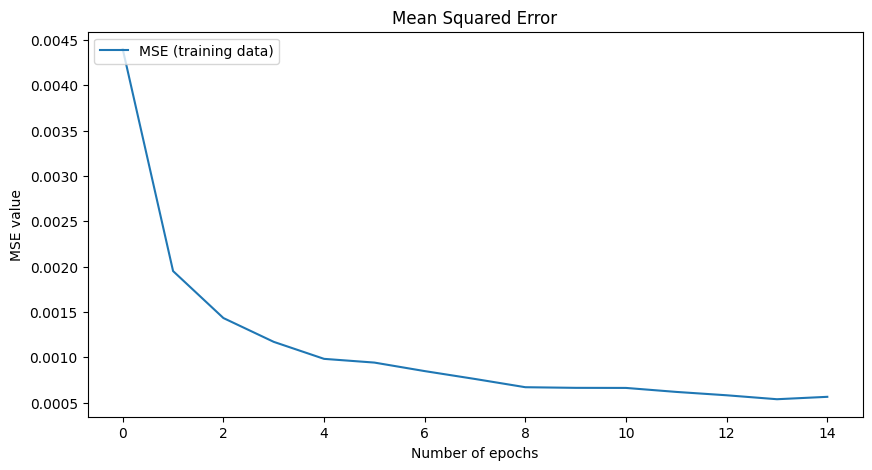

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='MSE (training data)')
plt.title('Mean Squared Error')
plt.ylabel('MSE value')
plt.xlabel('Number of epochs')
plt.legend(loc="upper left")
plt.show()

VISUALIZING TRAIN DATA

<ipython-input-16-ddd4fe0f2122>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = y_pred


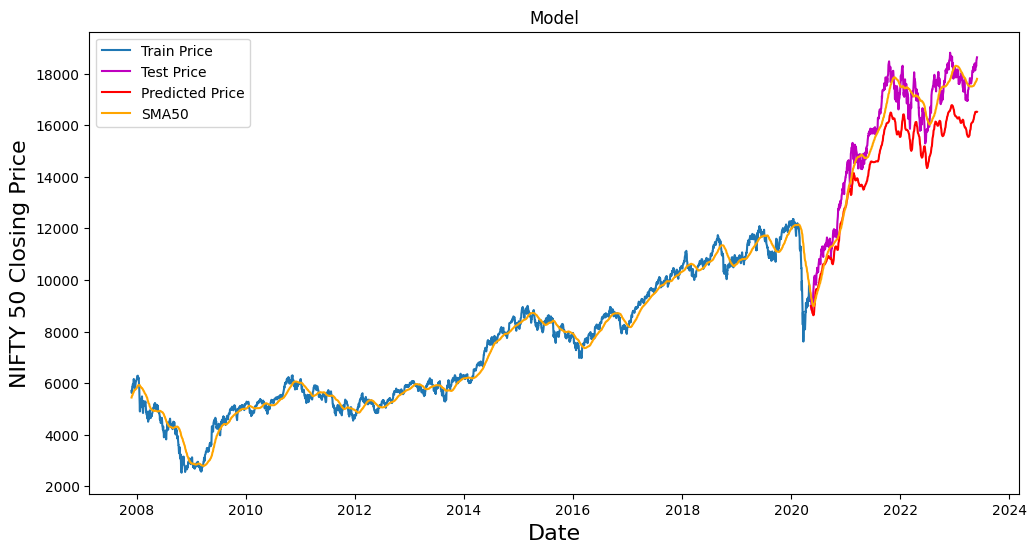

In [ ]:
train = data[:new_data_length]
test = data[new_data_length:]
test['predictions'] = y_pred

plt.figure(figsize=(12,6))
plt.title('Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('NIFTY 50 Closing Price', fontsize = 16)
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], color = 'm')
plt.plot(test['predictions'], color = 'red')
plt.plot(new_df.index,new_df.SMA50, label = "Moving Average", color = 'orange')
plt.legend(['Train Price', 'Test Price', 'Predicted Price', 'SMA50'], loc= 'upper left')
plt.show()

In [ ]:
print(test)

                   Close   predictions
Date                                  
2020-05-12   9196.549805   8988.075195
2020-05-13   9383.549805   8964.833008
2020-05-14   9142.750000   8939.061523
2020-05-15   9136.849609   8912.321289
2020-05-18   8823.250000   8884.889648
...                  ...           ...
2023-05-24  18285.400391  16517.554688
2023-05-25  18321.150391  16513.935547
2023-05-26  18499.349609  16511.138672
2023-05-29  18598.650391  16511.914062
2023-05-30  18633.849609  16519.126953

[759 rows x 2 columns]


VISUALIZING TEST DATA

<ipython-input-19-4d0d5c850d38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['SMA50'] = test['Close'].rolling(50).mean()


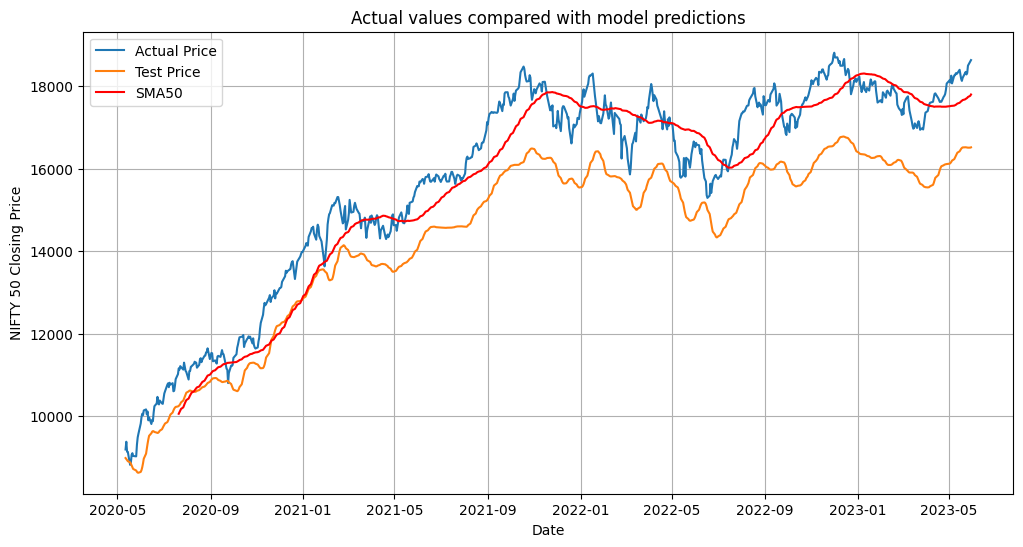

In [ ]:
test['SMA50'] = test['Close'].rolling(50).mean()
plt.figure(figsize = (12,6))
plt.title('Actual values compared with model predictions')
plt.ylabel('NIFTY 50 Closing Price')
plt.xlabel('Date')
plt.plot(test['Close'])
plt.plot(test['predictions'])
plt.plot(test['SMA50'], color = 'red')
plt.grid()
plt.legend(['Actual Price','Test Price','SMA50'], loc= 'upper left')
plt.show()

**GRU**

In [ ]:
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1), activation='tanh'))
model.add(Dropout(0.2))
model.add(GRU(units=50, return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))
model.add(GRU(units=50, return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))
model.add(GRU(units=50, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['accuracy'])

history1 = model.fit(x_train, y_train, batch_size = 10, epochs = 15)
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)

Epoch 1/15
296/296 [==============================] - 60s 171ms/step - loss: 0.0042 - accuracy: 3.3807e-04
Epoch 2/15
296/296 [==============================] - 51s 173ms/step - loss: 0.0018 - accuracy: 3.3807e-04
Epoch 3/15
296/296 [==============================] - 52s 177ms/step - loss: 0.0015 - accuracy: 3.3807e-04
Epoch 4/15
296/296 [==============================] - 51s 174ms/step - loss: 0.0012 - accuracy: 3.3807e-04
Epoch 5/15
296/296 [==============================] - 51s 173ms/step - loss: 0.0012 - accuracy: 3.3807e-04
Epoch 6/15
296/296 [==============================] - 51s 171ms/step - loss: 9.8679e-04 - accuracy: 3.3807e-04
Epoch 7/15
296/296 [==============================] - 52s 176ms/step - loss: 9.5259e-04 - accuracy: 3.3807e-04
Epoch 8/15
296/296 [==============================] - 51s 171ms/step - loss: 8.4794e-04 - accuracy: 3.3807e-04
Epoch 9/15
296/296 [==============================] - 51s 172ms/step - loss: 8.1190e-04 - accuracy: 3.3807e-04
Epoch 10/15
296/296 [

ERROR

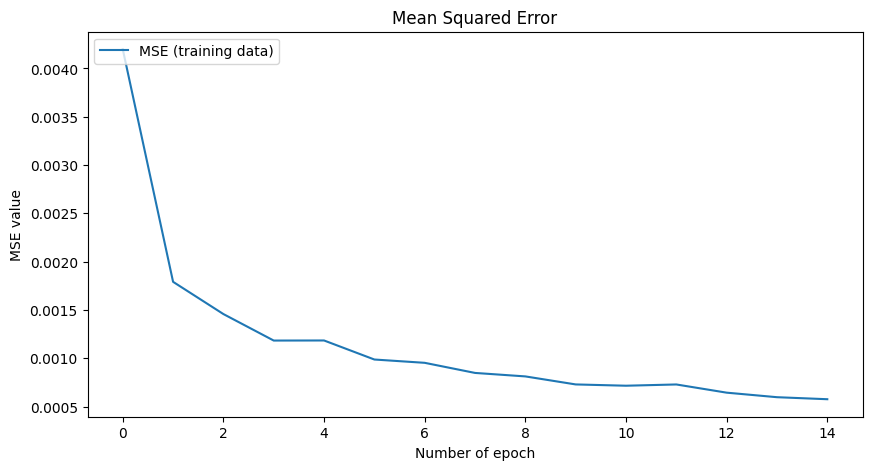

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history1.history['loss'], label='MSE (training data)')
plt.title('Mean Squared Error')
plt.ylabel('MSE value')
plt.xlabel('Number of epoch')
plt.legend(loc="upper left")
plt.show()

DATA VISUALIZATION

<ipython-input-23-5ce92bf90698>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = y_pred


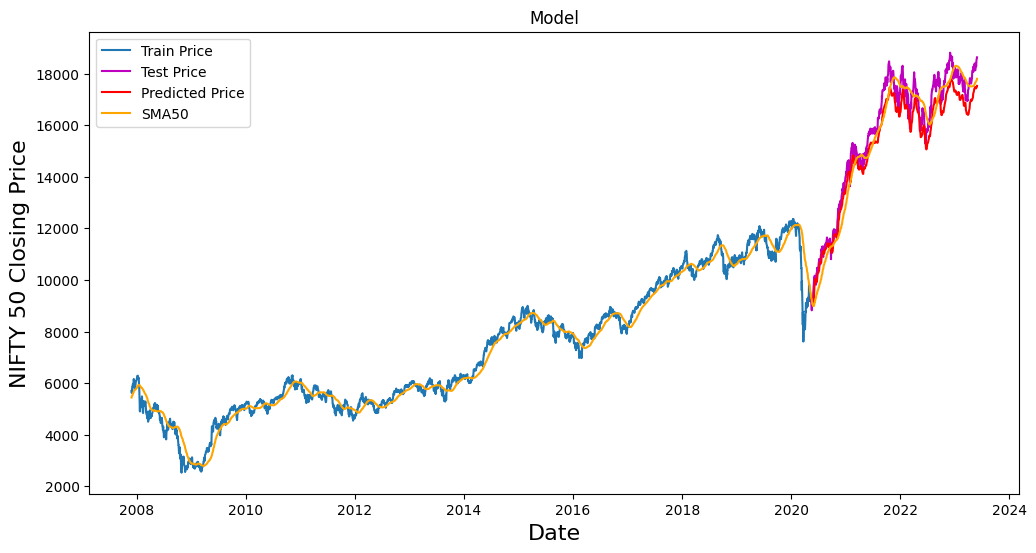

In [ ]:
train = data[:new_data_length]
test = data[new_data_length:]
test['predictions'] = y_pred


plt.figure(figsize=(12,6))
plt.title('Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('NIFTY 50 Closing Price', fontsize = 16)
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], color = 'm')
plt.plot(test['predictions'], color = 'red')
plt.plot(new_df.index,new_df.SMA50, label = "Moving Average", color = 'orange')
plt.legend(['Train Price', 'Test Price', 'Predicted Price', 'SMA50'], loc= 'upper left')
plt.show()

In [ ]:
print(test)

                   Close   predictions
Date                                  
2020-05-12   9196.549805   9294.486328
2020-05-13   9383.549805   9267.407227
2020-05-14   9142.750000   9261.990234
2020-05-15   9136.849609   9255.192383
2020-05-18   8823.250000   9239.105469
...                  ...           ...
2023-05-24  18285.400391  17434.906250
2023-05-25  18321.150391  17446.326172
2023-05-26  18499.349609  17458.884766
2023-05-29  18598.650391  17483.796875
2023-05-30  18633.849609  17525.507812

[759 rows x 2 columns]


VISUALIZING TEST DATA

<ipython-input-25-4d0d5c850d38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['SMA50'] = test['Close'].rolling(50).mean()


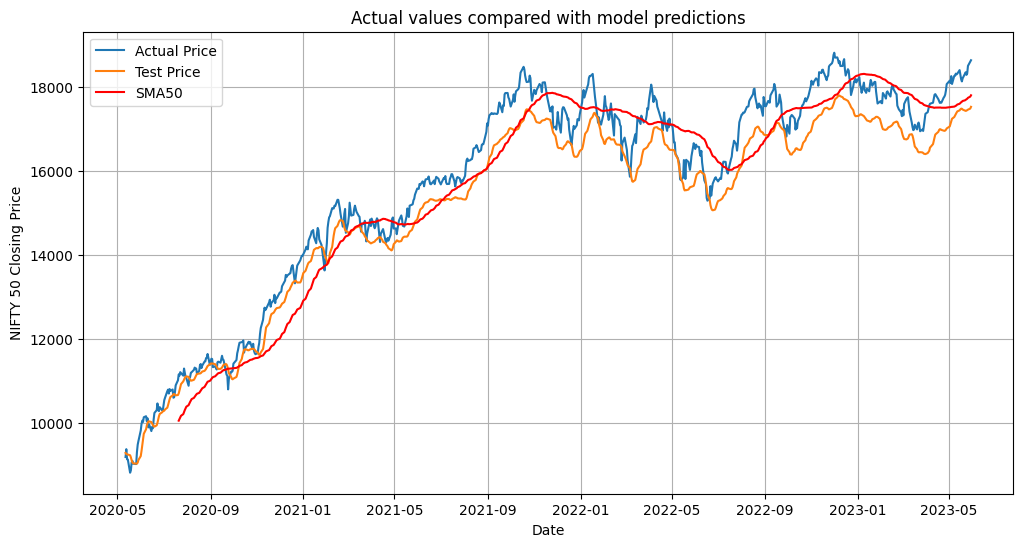

In [ ]:
test['SMA50'] = test['Close'].rolling(50).mean()
plt.figure(figsize = (12,6))
plt.title('Actual values compared with model predictions')
plt.ylabel('NIFTY 50 Closing Price')
plt.xlabel('Date')
plt.plot(test['Close'])
plt.plot(test['predictions'])
plt.plot(test['SMA50'], color = 'red')
plt.grid()
plt.legend(['Actual Price','Test Price','SMA50'], loc= 'upper left')
plt.show()